**Life cycle of Machine learning model**

- **Understanding the Problem Statement**
- **Data Collection**
- **Data Cleaning**
- **Exploratory data analysis**
- **Data Pre-Processing**
- **Modeling**
- **Model Evaluation**
- **Model Deployment**

-------------------------------------------

# 1) Problem Statement:


#### Objective: 

- The dataset contains information on transactions made by customers through an online retail platform. The objective is to analyze customer behavior and sales trends to provide actionable insights for business improvement and decision-making.

- The analysis will focus on identifying the countries with the most significant transaction sales, determining the years, months, and days that experienced the highest sales, and identifying the top-selling items for each year. Additionally, calculating the average sales amount for each transaction will provide an understanding of the typical purchase value. These insights can guide marketing strategies, inventory management, and revenue optimization efforts for the business.

# 2) Data Collection:

- The Dataset is collected from this link https://www.kaggle.com/code/themeeemul/eda-onlineretailtransaction.

- The dataset includes data on the products that were purchased, the quantity of each product, the date and time of each transaction, the price of each product, the unique identifier for each customer who made a purchase, and the country where each customer is located.

 **Column Descriptors :**

    - StockCode: A code used to identify the product that was purchased
    - Description: A brief description of the product that was purchased
    - Quantity: The quantity of the product that was purchased
    - InvoiceDate: The date and time that the purchase was made
    - UnitPrice: The price of one unit of the product that was purchased
    - CustomerID: The unique identifier for the customer who made the purchase
    - Country: The country where the customer who made the purchase is located

### 2.1 Import Required Packages

- **Importing Pandas, Numpy, Matplotlib, Seaborn libraries for various Operations**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

#Display all the columns of the dataframe
pd.pandas.set_option("display.max_columns", None)

### 2.2 Import CSV as dataset

- **Reading the CSV and storing it as Pandas DataFrame**

In [2]:
# Create Dataframe
transactions = pd.read_csv("online_retail.csv")

In [3]:
# Print shape of dataset
print(transactions.shape)

(541909, 8)


- We have 541909 Rows and 8 Columns.

In [4]:
transactions.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


# 3) Data Cleaning:

### 3.1 Data Accessing:
   **3.1.(a) Data Quality Issues:**

- #### **i) Manual Assessment:**

    - StockCode	: POST in Rows 47.. **Consistency**

    - Description : Discount in Row 123.., Postage in Rows 388.. **Consistency**

    - Quantity : Negative values **Validity**


- #### **ii) Programmatic Assessment:**

    - Description : 

     - 1454 missing values in Description **Completedness**;
     - 1 invalid description (historic computer difference?....se) in Row 373660 **Validity**
     - 1 invalid description (Missing) in Row 165448 **Validity**
     
    - UnitPrice: Negative values **Validity**
    - InvoiceDate : need to change dtype to DateTime **Accuracy**
    - 5268 duplicated records

In [5]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  int64  
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 33.1+ MB


In [6]:
transactions.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,15287.518434
std,218.081158,96.759853,1484.746041
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14367.000000
50%,3.000000,2.080000,15287.000000
75%,10.000000,4.130000,16255.000000
max,80995.000000,38970.000000,18287.000000


- **Checking Duplicates**

In [7]:
transactions.duplicated().sum()

5268

In [8]:
transactions[transactions.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446,United Kingdom


- **Checking Unique values of the column**

In [9]:
transactions['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: Description, Length: 4223, dtype: int64

In [10]:
#'invalid' Description

transactions[transactions['Description'] == 'Missing']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
165448,550800,22458,Missing,-65,2011-04-20 14:48:00,0.0,15287,United Kingdom


In [11]:
#'invalid' Description

transactions[transactions['Description'] == 'historic computer difference?....se']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
373660,569341,82600,historic computer difference?....se,-458,2011-10-03 14:19:00,0.0,15287,United Kingdom


In [12]:
transactions['InvoiceDate'].value_counts()

2011-10-31 14:41:00    1114
2011-12-08 09:28:00     749
2011-12-09 10:03:00     731
2011-12-05 17:24:00     721
2011-06-29 15:58:00     705
                       ... 
2011-09-28 09:57:00       1
2011-09-28 09:45:00       1
2011-03-16 12:13:00       1
2011-03-16 12:22:00       1
2011-03-16 15:58:00       1
Name: InvoiceDate, Length: 23260, dtype: int64

In [13]:
transactions['Quantity'].value_counts()

 1        148227
 2         81829
 12        61063
 6         40868
 4         38484
           ...  
-472           1
-161           1
-1206          1
-272           1
-80995         1
Name: Quantity, Length: 722, dtype: int64

In [14]:
transactions[transactions['Quantity'] == -472]
transactions[transactions['Quantity'] == -161]
transactions[transactions['Quantity'] == -1206]
transactions[transactions['Quantity'] == -272]
transactions[transactions['Quantity'] == -80995]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446,United Kingdom


In [15]:
transactions['UnitPrice'].value_counts()

1.25      50496
1.65      38181
0.85      28497
2.95      27768
0.42      24533
          ...  
84.21         1
46.86         1
28.66         1
156.45        1
224.69        1
Name: UnitPrice, Length: 1630, dtype: int64

- **Checking for Missing values using is_null function**

In [16]:
transactions.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

 ### 3.2 Data Cleaning:

   **Order of severity:**

    - Completeness -> Validity -> Accuracy -> Consistency


   **Data Cleaning Order:**

    1. Quality -> Completeness
    2. Tidiness
    3. Quality -> Validity
    4. Quality -> Accuracy
    5. Quality -> Consistency

   **Steps involved in Data cleaning:**

    - Define
    - Code
    - Test

In [17]:
# make a copy
df = transactions.copy()

In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


### Define:

- 1454 missing values in 'Description'
- Negative values in 'Quantity' & 'UnitPrice'
- 5268 duplicated records
- Datatype of 'InvoiceDate'is in object

In [19]:
# Code

# Dropping missing values in Description
df.dropna(inplace=True)

In [20]:
# Test

df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [21]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [22]:
df['Quantity'].value_counts()

 1        148101
 2         81763
 12        61049
 6         40846
 4         38461
           ...  
 3186          1
 291           1
 172           1
 3100          1
-80995         1
Name: Quantity, Length: 671, dtype: int64

In [23]:
# Code

# quantities & UnitPrice can not be negative, making it positive

df['Quantity'] = df['Quantity'].abs()
df['UnitPrice'] = df['UnitPrice'].abs()

In [24]:
# Test

df['Quantity'].value_counts

<bound method IndexOpsMixin.value_counts of 0          6
1          6
2          8
3          6
4          6
          ..
541904    12
541905     6
541906     4
541907     4
541908     3
Name: Quantity, Length: 540455, dtype: int64>

In [25]:
df['UnitPrice'].value_counts

<bound method IndexOpsMixin.value_counts of 0         2.55
1         3.39
2         2.75
3         3.39
4         3.39
          ... 
541904    0.85
541905    2.10
541906    4.15
541907    4.15
541908    4.95
Name: UnitPrice, Length: 540455, dtype: float64>

In [26]:
df[df['Description'] == 'Missing']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
165448,550800,22458,Missing,65,2011-04-20 14:48:00,0.0,15287,United Kingdom


In [27]:
df[df['Description'] == 'historic computer difference?....se']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
373660,569341,82600,historic computer difference?....se,458,2011-10-03 14:19:00,0.0,15287,United Kingdom


In [28]:
# Dropping invalid Description

df = df.drop([df.index[165448], df.index[373660]])

In [29]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [30]:
df['InvoiceDate']

0         2010-12-01 08:26:00
1         2010-12-01 08:26:00
2         2010-12-01 08:26:00
3         2010-12-01 08:26:00
4         2010-12-01 08:26:00
                 ...         
541904    2011-12-09 12:50:00
541905    2011-12-09 12:50:00
541906    2011-12-09 12:50:00
541907    2011-12-09 12:50:00
541908    2011-12-09 12:50:00
Name: InvoiceDate, Length: 540453, dtype: object

In [31]:
# Changing InvoiceDate to datetime type

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],dayfirst = True)

In [32]:
# Test
df['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 540453, dtype: datetime64[ns]

In [33]:
# Checking if any duplicated value 

df.duplicated().sum()

5268

In [34]:
# Dropping duplicated value

df = df.drop_duplicates()

In [35]:
# Test

df.duplicated().sum()

0

# 4) Exploratory Data Analysis:

In [36]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [37]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

In [38]:
# Creating column for each year, months, days and weekday

df['year'] = df['InvoiceDate'].dt.year

df['month'] = df['InvoiceDate'].dt.month

df['day'] = df['InvoiceDate'].dt.day

df['weekday'] = df['InvoiceDate'].dt.weekday

dw_mapping ={
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
} 

df['dayofweek']= df['InvoiceDate'].dt.weekday.map(dw_mapping)

In [39]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,weekday,dayofweek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,1,2,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,2,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,1,2,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,2,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,2,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,2011,12,9,4,Friday
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,2011,12,9,4,Friday
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,2011,12,9,4,Friday
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,2011,12,9,4,Friday


### Univariate Analysis:

**UnitPrice**

**Conclusions**

- There are some outliers
- The data is highly(positively) skewed

**Sales**

**Conclusions**

- Created sales column # Sales = qty * price
- There are some outliers
- The data is highly(positively) skewed.

In [40]:
df['UnitPrice'].describe()

count    535185.000000
mean          4.727929
std          97.361012
min           0.000000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

<AxesSubplot:>

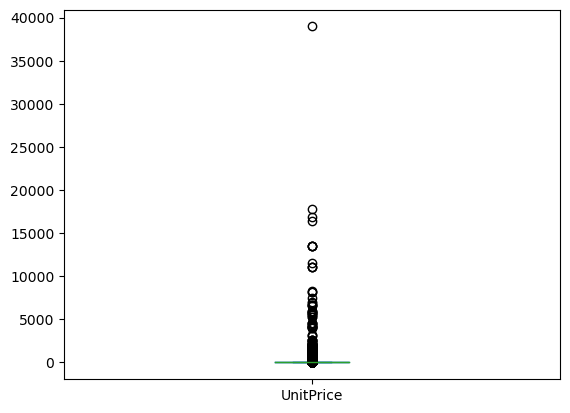

In [41]:
# Outliers

df['UnitPrice'].plot(kind='box')

In [42]:
# Skewness

df['UnitPrice'].skew()

196.33255367077913

In [43]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,weekday,dayofweek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,1,2,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,2,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,1,2,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,2,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,2,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,2011,12,9,4,Friday
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,2011,12,9,4,Friday
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,2011,12,9,4,Friday
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,2011,12,9,4,Friday


In [44]:
# Create column of sales
# Sales = qty * price

df['Sales'] = df['Quantity'] * df['UnitPrice']
df['Sales'].head()

0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: Sales, dtype: float64

In [45]:
df['Sales'].describe()

count    535185.000000
mean         21.596624
std         380.993898
min           0.000000
25%           3.900000
50%           9.900000
75%          17.700000
max      168469.600000
Name: Sales, dtype: float64

In [46]:
# Skewness

df['Sales'].skew()

359.48063175459225

In [47]:
df['Sales'].isnull().sum()

0

### Bivariete Analysis

<AxesSubplot:xlabel='Sales', ylabel='Country'>

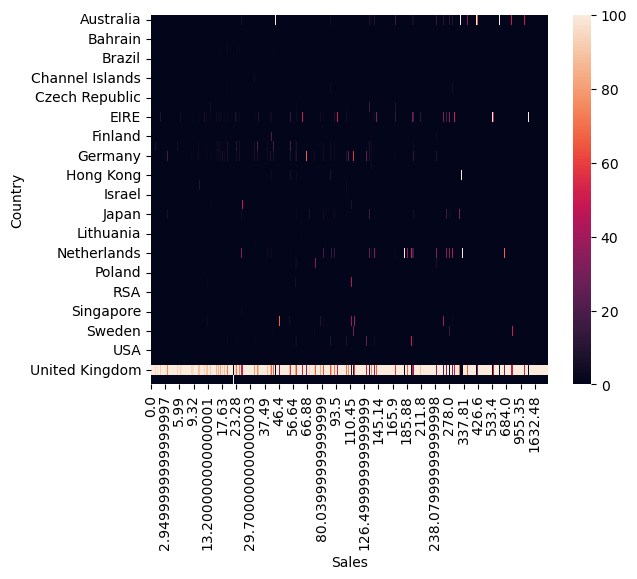

In [48]:
sns.heatmap(pd.crosstab(df['Country'],df['Sales'],normalize='columns')*100)

In [49]:
pd.crosstab(df['year'],df['Sales'])

Sales  0.000       0.001       0.060       0.080       0.100       0.120       \
year                                                                            
2010          146           0           0           0           0           0   
2011          910           4           2           1           3          24   

Sales  0.140       0.160       0.180       0.190       0.210       0.220       \
year                                                                            
2010            2           0           1           0           8           0   
2011            2           1           1          84          96           1   

Sales  0.240       0.250       0.290       0.300       0.320       0.350       \
year                                                                            
2010            0           0          31           0           0           0   
2011           21           1         224          14           3           1   

Sales  0.360       0.380       0.390       0.400       0.420       0.420       \
year                                                                            
2010            0           3           0           0         139           0   
2011           23          84        1085           2        2117           1   

Sales  0.430       0.480       0.500       0.530       0.550       0.560       \
year                                                                            
2010           52           0           2           0          63           0   
2011           57          17           3           2        1238           1   

Sales  0.570       0.580       0.590       0.600       0.620       0.630       \
year                                                                            
2010            0           7           0           1           0           3   
2011           58         186          47          21           7         140   

Sales  0.640       0.650       0.720       0.750       0.760       0.770       \
year                                                                            
2010            0          82           2           0           0           0   
2011            7         969          50          85          72           1   

Sales  0.780       0.790       0.800       0.810       0.820       0.830       \
year                                                                            
2010            0           0           1          16           0           2   
2011          868         554           8          44          11        6203   

Sales  0.840       0.850       0.860       0.870       0.900       0.950       \
year                                                                            
2010          102         858          29           8           0          54   
2011         1572        3056          42         107           4         490   

Sales  0.960       0.990       1.000       1.010       1.040       1.050       \
year                                                                            
2010            0           0           2           0           0           0   
2011            8           1          16           1           1           2   

Sales  1.050       1.060       1.070       1.080       1.100       1.120       \
year                                                                            
2010            2           2           0           0          44           0   
2011           36          30           1           6         838           2   

Sales  1.140       1.160       1.170       1.180       1.200       1.200       \
year                                                                            
2010            1           3           0           0           1           0   
2011           74         141         373          28           9           2   

Sales  1.210       1.230       1.240       1.250       1.260       1.280       \
year               

<AxesSubplot:>

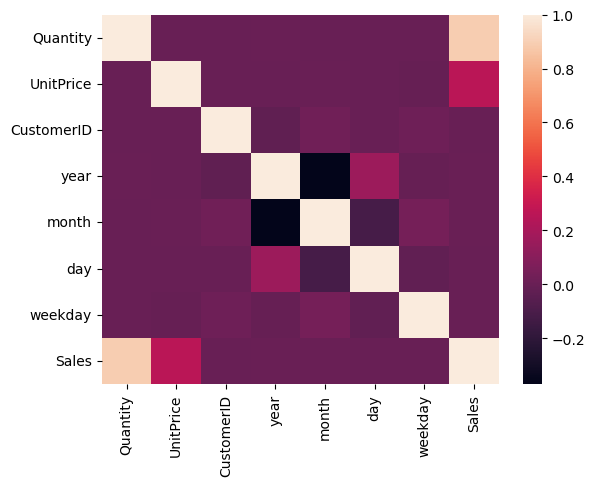

In [50]:
sns.heatmap(df.corr())

### 4.1 Which country have the most transaction sales?

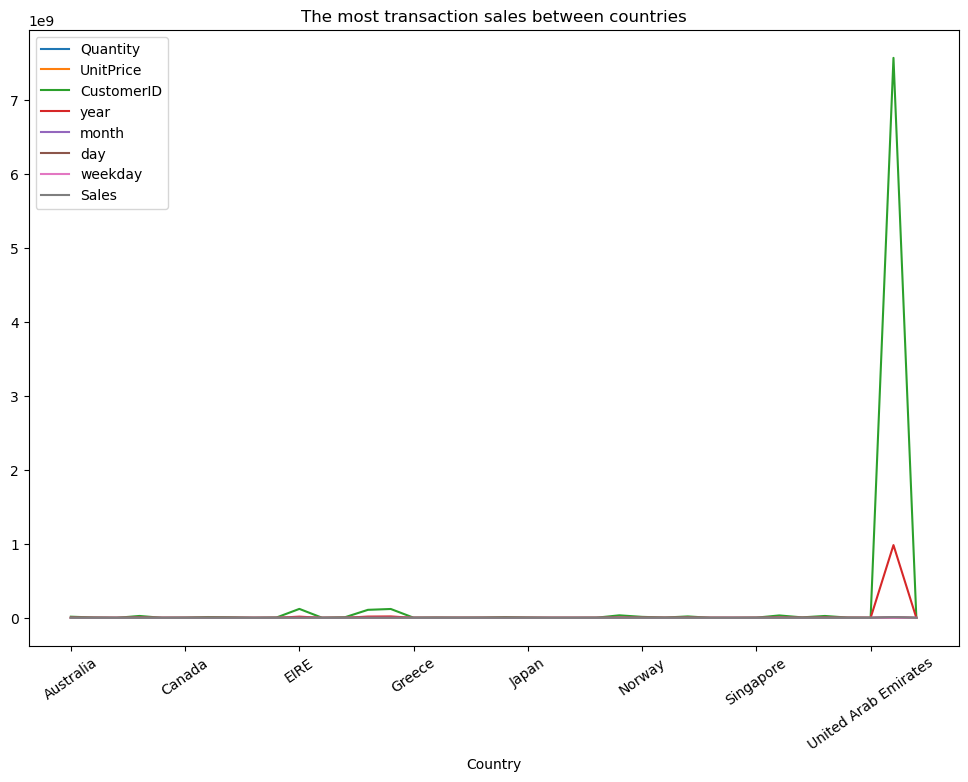

In [51]:
df_country = df.groupby(by=['Country']).sum()
df_country.plot(kind='line', figsize=(12,8))
plt.title("The most transaction sales between countries")
plt.xticks(rotation=35)
plt.show()

- United Arab Emirates is the country that have the most sales.

### 4.2 Which year that have the most sales?

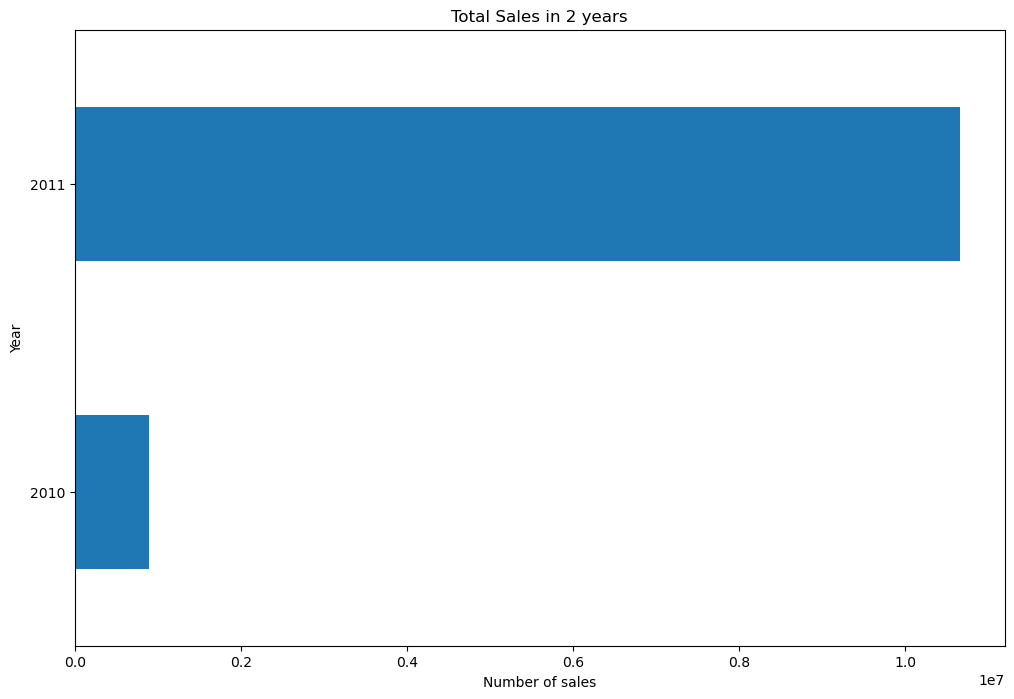

In [52]:
df_year = df.groupby(by=['year']).sum()['Sales']
df_year.plot(kind='barh',figsize=(12,8))
plt.title('Total Sales in 2 years')
plt.xlabel('Number of sales')
plt.ylabel('Year')
plt.show()

- The above Chart shows:

- Most sales in year 2011.
- Least sales in year 2010.

### 4.3 Which month that have the most sales?

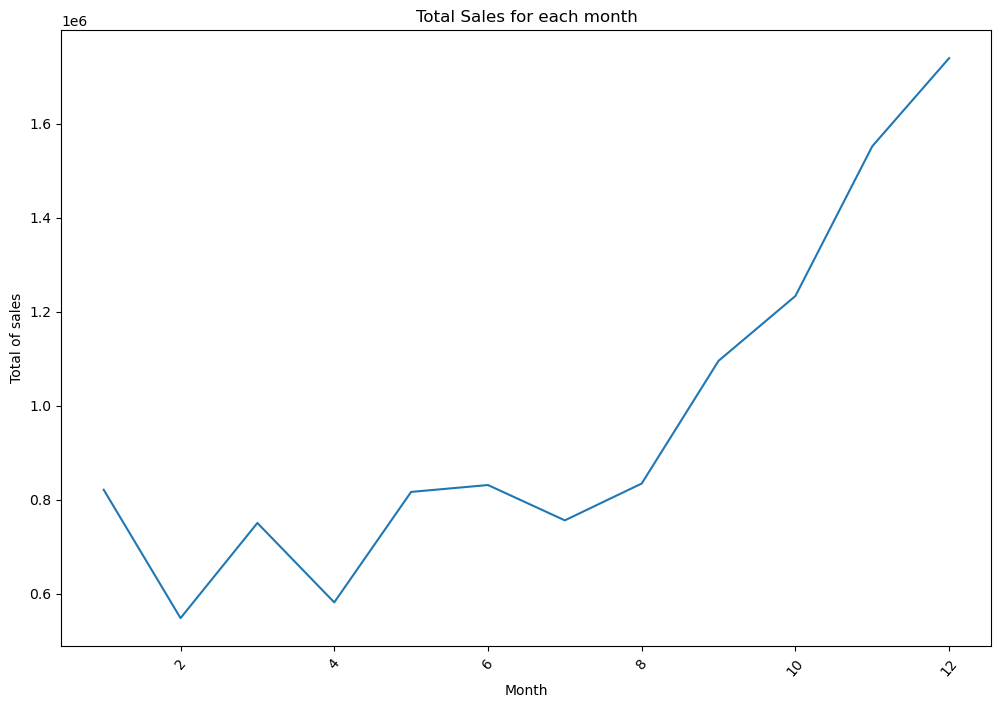

In [53]:
df_month = df.groupby(by=['month']).sum()['Sales']
df_month.plot(kind='line',figsize=(12,8))
plt.title('Total Sales for each month')
plt.ylabel('Total of sales')
plt.xlabel('Month')
plt.xticks(rotation=50)
plt.show()

- The above Chart shows:

- Most sales in December.
- Least sales in February.

### 4.4 Which day that have the most sales?

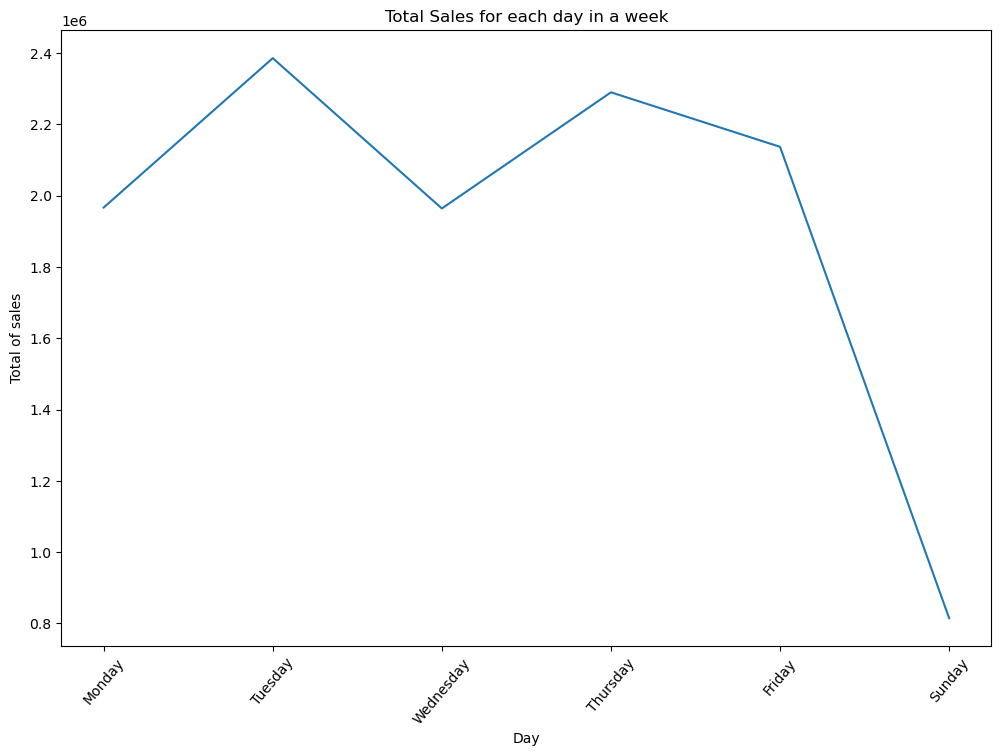

In [54]:
df_dayofweek = df.groupby(by=['dayofweek']).sum().sort_values('weekday',ascending=True)['Sales']
df_dayofweek.plot(kind='line',figsize=(12,8))
plt.title('Total Sales for each day in a week')
plt.ylabel('Total of sales')
plt.xlabel('Day')
plt.xticks(rotation=50)
plt.show()

### 4.5 Top 10 items that have the most sales in each year

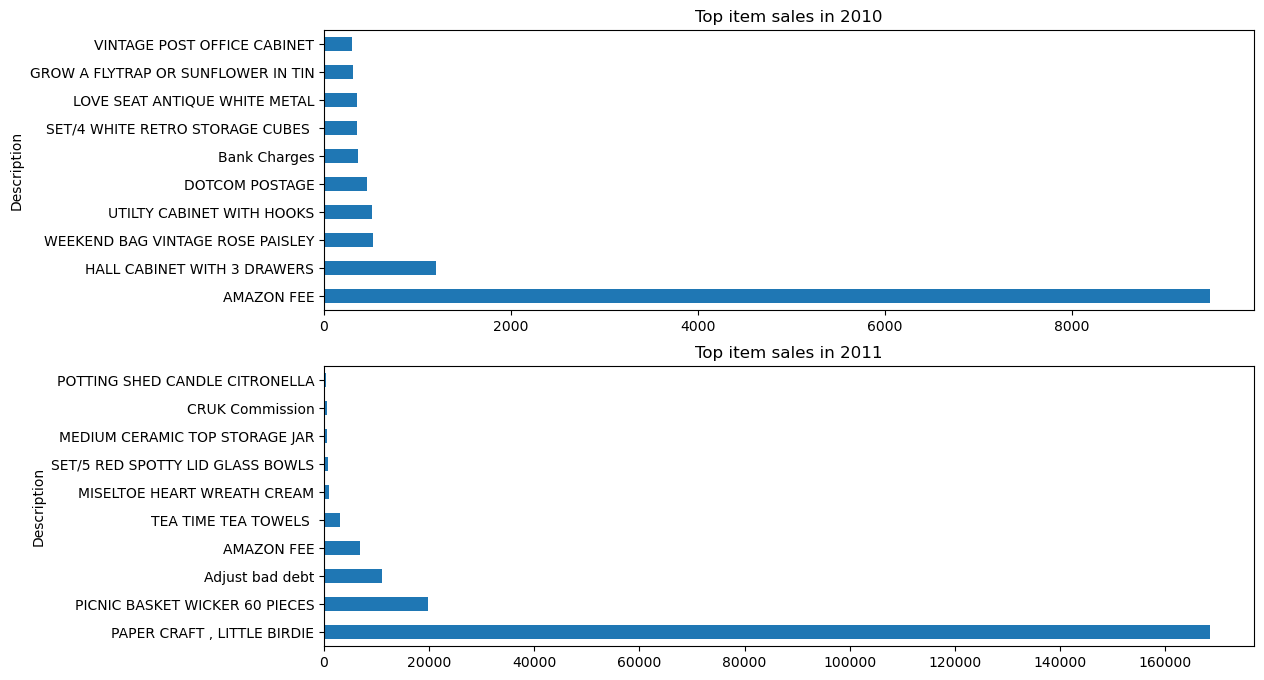

In [55]:
plt.subplot(2,1,1)
# creating the bar plot
df_sales_item_2010 = df.groupby(['Description','year']).mean()
df_sales_item_2010 = df_sales_item_2010.unstack('year')['Sales']
df_sales_item_2010 = df_sales_item_2010.sort_values(2010,ascending=False)[2010].head(10).plot(kind='barh',figsize=(12,8))
plt.title("Top item sales in 2010")
plt.subplot(2,1,2)
df_sales_item_2011 = df.groupby(['Description','year']).mean()
df_sales_item_2011 = df_sales_item_2011.unstack('year')['Sales']
df_sales_item_2011 = df_sales_item_2011.sort_values(2011,ascending=False)[2011].head(10).plot(kind='barh',figsize=(12,8))

plt.title("Top item sales in 2011")
plt.show()

### 4.6 Top 10 most purchased items

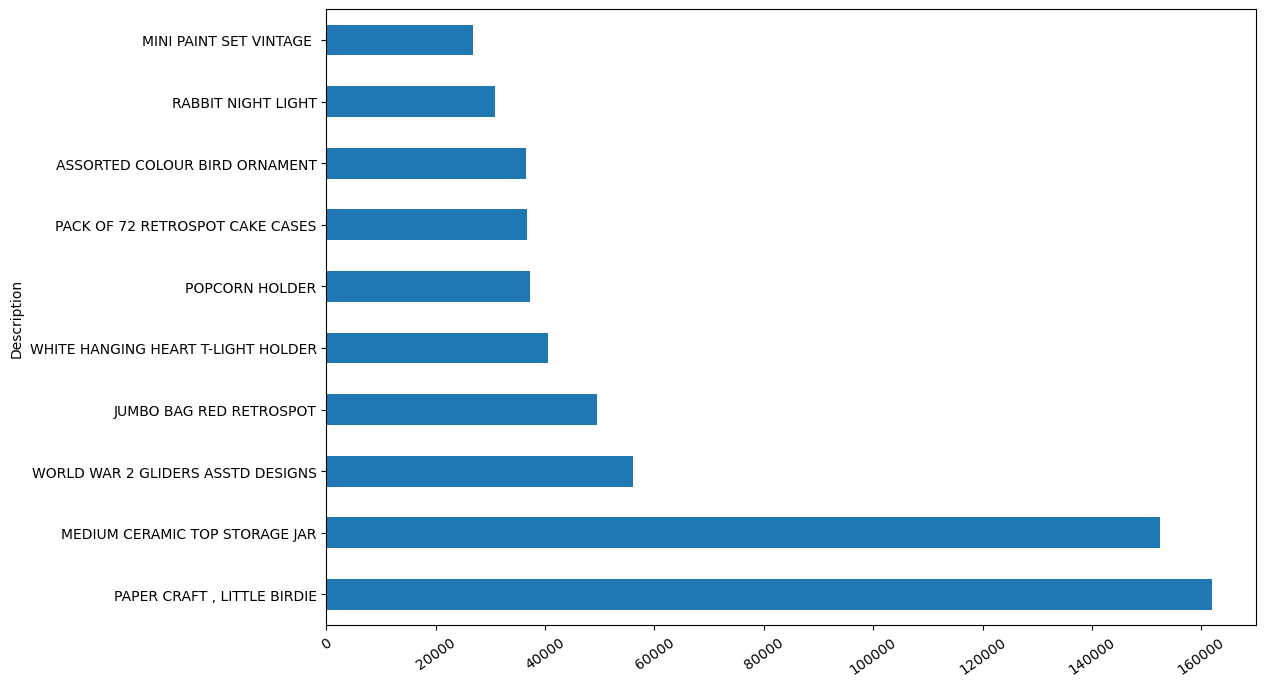

In [56]:
df_purchased_item = df.groupby('Description').sum()
df_purchased_item = df_purchased_item.sort_values('Quantity',ascending=False).head(10)
df_purchased_item['Quantity'].plot(kind = 'barh',figsize=(12,8))
plt.xticks(rotation=35)
plt.show()